# Árboles de decisión II
## author: Virginia Ordoño Bernier
## date: february 2024

En este ejercicio se aplican diferentes modelos de árboles del decisión al dataset Iris:
1. Arbol de decisión
2. Random forest
3. Gradient boosting

Además hay que indicar la importancia de cada característica.

### 1. Gestión de datos

#### 1.1 Carga y creación del dataframe

In [88]:
import pandas as pd
import inflection
from sklearn import datasets

# Cargar el conjunto de datos de ejemplo (Iris)
iris = load_iris()
X = iris.data
y = iris.target

# Convertir los datos en DataFrame y cambiar nombre columnas
df_iris = pd.DataFrame(data=X, columns=iris.feature_names)
df_iris.columns = [inflection.underscore(col.replace(' ', '_').replace('(', '').replace(')', '')) for col in df_iris.columns]

# Agrega target
df_iris['target'] = y

df_iris


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### 1.2 Visualización de la distribución de las clases

c:\Users\vober\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\vober\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\vober\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

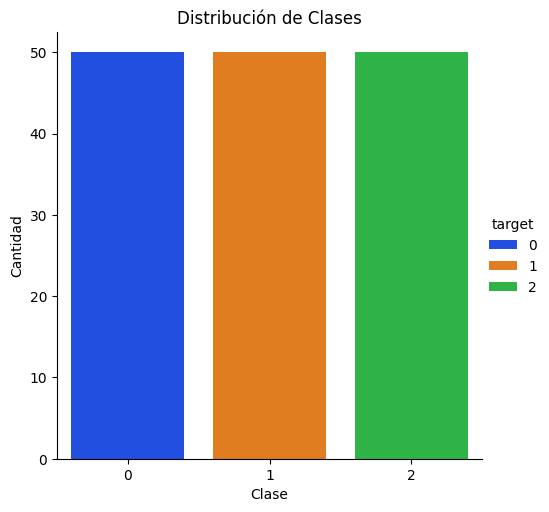

In [89]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.catplot(x='target', data=df_iris, kind='count', hue='target', palette='bright')
plt.title("Distribución de Clases")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.show()

### 1.3. Preparación de datos para el entrenamiento

In [90]:
from sklearn.model_selection import train_test_split

X = df_iris.drop('target', axis=1)
y = df_iris['target']

# Divide el DataFrame en conjuntos de entrenamiento y prueba 
train, test = train_test_split(df_iris, test_size=0.33, random_state=42)

# Reseteo de índices
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

# Separación características y etiquetas
X_train = train.drop('target', axis=1)  
y_train = train['target']  
X_test = test.drop('target', axis=1)  
y_test = test['target']

print("Conjunto de entrenamiento:")
print(X_train.head()) 

print("\nConjunto de prueba:")
print(X_test.head())  


Conjunto de entrenamiento:
   sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm
0              5.7             2.9              4.2             1.3
1              7.6             3.0              6.6             2.1
2              5.6             3.0              4.5             1.5
3              5.1             3.5              1.4             0.2
4              7.7             2.8              6.7             2.0

Conjunto de prueba:
   sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm
0              6.1             2.8              4.7             1.2
1              5.7             3.8              1.7             0.3
2              7.7             2.6              6.9             2.3
3              6.0             2.9              4.5             1.5
4              6.8             2.8              4.8             1.4


## MODELO: ÁRBOL DE DECISIÓN (CLASIFICACIÓN)

#### 1. HISTOGRAMA

c:\Users\vober\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\vober\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\vober\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

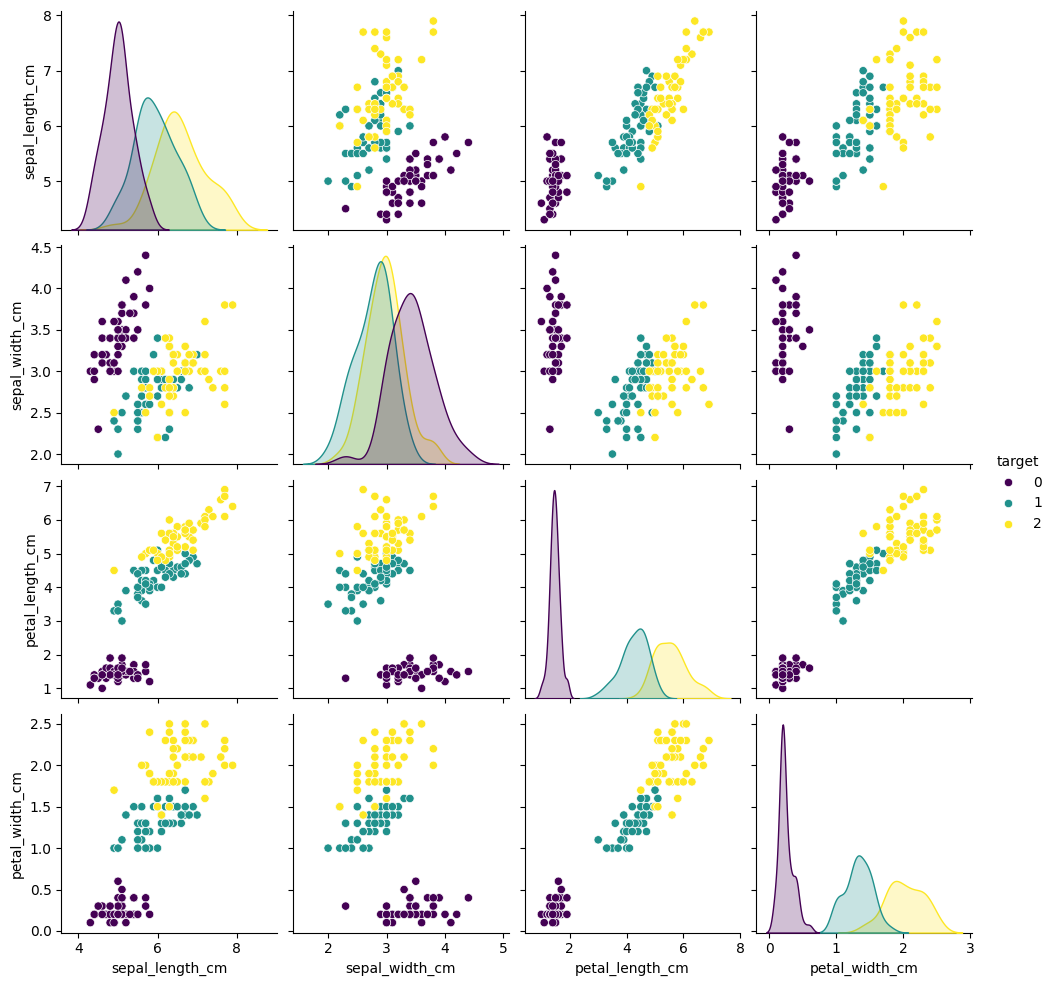

In [91]:
import seaborn as sns

#hue='variable_name': para colorear los puntos según esa variable. 
sns.pairplot(df_iris, palette='viridis', hue='target')

### Validación cruzada

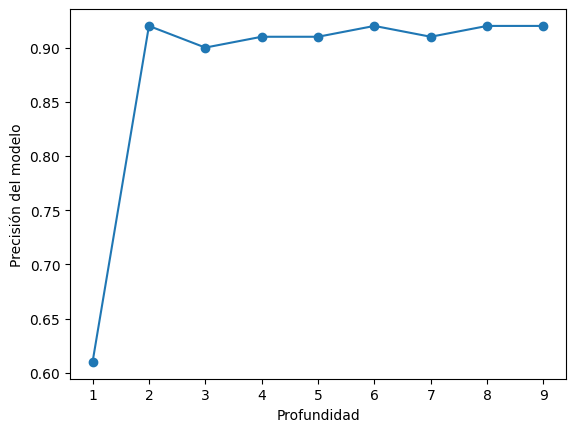

Mejor precisión: 0.9200 . Mejor profundidad: 2


In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

cv = KFold(n_splits=10, shuffle=False)

accuracies_list = list()
max_attributes = len(list(train))
depth_range = range(1, max_attributes * 2)

# Inicializar las variables best_accuracy y best_depth antes del bucle
best_accuracy = 0
best_depth = 0

for depth in depth_range:
    fold_accuracy = []
    model = DecisionTreeClassifier(criterion='entropy', max_depth=depth)

    for train_fold, test_fold in cv.split(train):
        f_train = train.loc[train_fold]
        f_test = train.loc[test_fold]

        model = model.fit(
            X=f_train.drop(['target'], axis=1),
            y=f_train['target']
        )
        test_acc = model.score(
            X=f_test.drop(['target'], axis=1),
            y=f_test['target'])
        fold_accuracy.append(test_acc)

    avg = sum(fold_accuracy) / len(fold_accuracy)
    accuracies_list.append(avg)
    
    # Actualizar la mejor precisión y profundidad
    if avg > best_accuracy:
        best_accuracy = avg
        best_depth = depth
    
plt.plot(depth_range, accuracies_list, marker='o')
plt.xlabel('Profundidad')
plt.ylabel('Precisión del modelo')
plt.show()

print(f"Mejor precisión: {best_accuracy:.4f} . Mejor profundidad: {best_depth}")


## Construcción del modelo con el mejor parámetro de profundidad

In [93]:
from sklearn.metrics import classification_report
model = DecisionTreeClassifier(criterion='entropy', max_depth = best_depth)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## Importancia de las variables

Informe de Importancia de las Variables:
   Características  Importancia
2  petal_length_cm     0.669114
3   petal_width_cm     0.330886
0  sepal_length_cm     0.000000
1   sepal_width_cm     0.000000


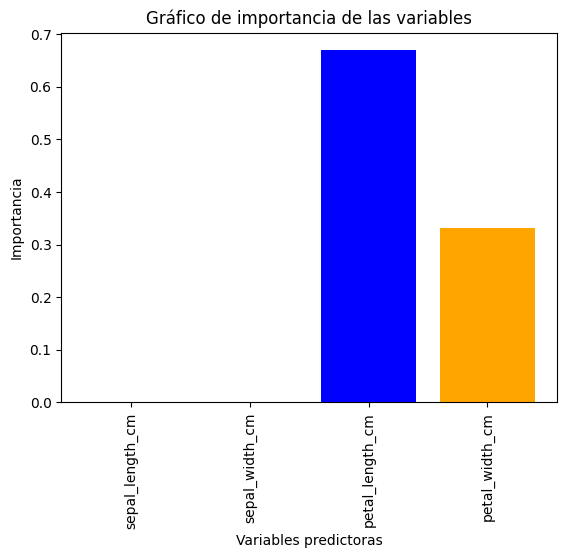

In [94]:
features_names = df_iris.columns[:-1].tolist() # Todos la última

# Cargamos la importancia de las características
importances = model.feature_importances_

# Create dataframe
feature_importance_df = pd.DataFrame({'Características':features_names, 'Importancia': importances})

# Order by importance
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Mostramos
print("Informe de Importancia de las Variables:")
print(feature_importance_df)

# Gráfico de importancia de las variables
colors = ['red', 'green', 'blue', 'orange', 'purple']
plt.bar(features_names, importances, color=colors)
plt.xticks(rotation=90)
plt.xlabel('Variables predictoras')
plt.ylabel('Importancia')
plt.title('Gráfico de importancia de las variables')
plt.show()

## Visualización del árbol

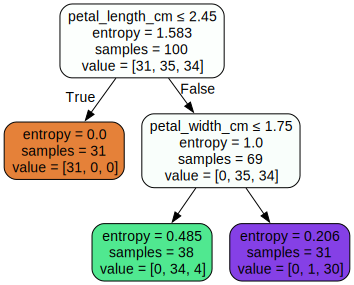

In [96]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error


# Crear un archivo DOT que representa el árbol de decisión (en este caso se devuelve como cadena)
# out_file=None: archivo de salida para guardar la representación del árbol. En este caso, se almaacena en la variable dot_data en lugar de en un archivo.

dot_data = export_graphviz(model, out_file=None,
                        feature_names = features_names,
                        filled=True, rounded=True, special_characters=True)

# Generar el gráfico del árbol de decisión desde el archivo DOT
graph = graphviz.Source(dot_data)

# Mostrar
#graph.view("arbol_de_decision")  # Esto guardará el gráfico en un archivo llamado "arbol_de_decision.pdf"
display(graph)

## MODELO: RANDOM FOREST